___

# **Credit Score Classification**

___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'data\raw\Credit_Score.zip',compression='zip',low_memory=False)

In [3]:
# Removing features that are not useful in model training
df.drop(['ID','Customer_ID','Name','SSN'],axis=1,inplace=True)

## Data Cleaning

In [4]:
# Data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [5]:
# Summary statistics of all object columns
df.describe(include='O').T

,count,unique,top,freq
Month,100000,8,January,12500
Age,100000,1788,38,2833
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408
Num_of_Delayed_Payment,92998,749,19,5327
Changed_Credit_Limit,100000,4384,_,2091
Credit_Mix,100000,4,Standard,36479
Outstanding_Debt,100000,13178,1360.45,24


In [6]:
# Summary statistics of all numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
# Columns containing null values
df[df.columns[df.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly_Inhand_Salary    84998 non-null  float64
 1   Type_of_Loan             88592 non-null  object 
 2   Num_of_Delayed_Payment   92998 non-null  object 
 3   Num_Credit_Inquiries     98035 non-null  float64
 4   Credit_History_Age       90970 non-null  object 
 5   Amount_invested_monthly  95521 non-null  object 
 6   Monthly_Balance          98800 non-null  object 
dtypes: float64(2), object(5)
memory usage: 5.3+ MB


- As we can see from above steps, a good amount of null values are present and
- Many numeric type column seems to be encoded in object format

- We will explore each feature and clean the data as necessary

In [8]:
# Checking Credit_History_Age columns
df['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

- As seen above Credit_History_Age column seems to be string entries of credit history age in number of years and months
- We will convert this into a numerical value that gives the exact same info in numbers

In [9]:
temp_dates = pd.DataFrame()

# Here we are splitting the Credit_History_Age column based on white spaces and only storing the numerical values into a new dataframe
temp_dates[['Year','Month']] = df['Credit_History_Age'].str.split(expand=True).get([0,3])

# Converting the numerical value from string representation to float
temp_dates[['Year','Month']] = temp_dates[['Year','Month']].astype(float)

# Combinig the two values of years and months into a single numerical value
temp_dates['Years'] = temp_dates['Year'] + (temp_dates['Month'] / 12)

# Assigning these values into the original Credit_History_Age column
df['Credit_History_Age'] = temp_dates['Years']

In [10]:
# Checking the other object columns
df['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [11]:
df['Occupation'] = df['Occupation'].replace('_______',np.nan)
df['Occupation'].isnull().sum()

7062

In [12]:
# Getting the unique value counts 
df['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

- As seen above Type_of_Loan columns has a very high cardinality and the its entries does not make sense. We will remove it

In [13]:
df.drop('Type_of_Loan',axis=1,inplace=True)

In [14]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

- Credit_Mix column contains 20195 values of '_' which needs to be corrected

In [15]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [16]:
# Replacing the NM in Payment_of_Min_Amount to No
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('NM','No')

In [17]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

- Payment_Behaviour seems to be ordinal in nature
- It also has some error in entires which needs to be corrected

In [18]:
# Replacing the values that doesnt make any sense in both these columns to NaN
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [19]:
# Making a list of numeric columns
numeric_cols = df.select_dtypes(exclude='O').columns.to_list()
numeric_cols

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month']

In [20]:
# Making a list of all the wrongly encoded numerical columns
object_to_numeric_cols = [cols for cols in df.select_dtypes(include='O').columns if (pd.to_numeric(df[cols],errors='coerce').notna()).any()]

# Converting these features to numeric.
df[object_to_numeric_cols] = df[object_to_numeric_cols].apply(lambda x: pd.to_numeric(x,errors='coerce'))
object_to_numeric_cols

['Age',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [21]:
# Descriptive stats of all numeric features
updated_num_cols = numeric_cols + object_to_numeric_cols
df[updated_num_cols].describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,90970.000000,100000.000000,95061.000000,9.302000e+04,95215.000000,90254.000000,97909.000000,98991.000000,91216.000000,98791.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,18.432950,1403.118217,110.934505,1.785790e+05,2.780339,31.033051,10.389025,1426.503700,195.539456,402.551258
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8.311780,8306.041270,689.407864,1.442878e+06,62.500940,226.955758,6.789496,1155.045753,199.564527,213.925499
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.083333,0.000000,-500.000000,7.005930e+03,-100.000000,-3.000000,-6.490000,0.230000,0.000000,0.007760
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,12.000000,30.306660,24.000000,1.943560e+04,1.000000,9.000000,5.320000,566.080000,72.236692,270.106630
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,18.250000,69.249473,33.000000,3.755074e+04,3.000000,14.000000,9.400000,1166.370000,128.954538,336.731225
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,25.166667,161.224249,42.000000,7.284338e+04,5.000000,18.000000,14.870000,1948.200000,236.815814,470.262938
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,33.666667,82331.000000,8698.000000,2.419806e+07,1496.000000,4397.000000,36.970000,4998.070000,1977.326102,1602.040519


- From observing the descriptive stats it can be seen that some features contain neative values where it should not.
- For eg the Age column has a min value of -500 which doesnt make any sense. We will deal with these columns appropriately

In [22]:
for cols in ['Num_Bank_Accounts', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_of_Loan', 'Num_of_Delayed_Payment']:
    df.loc[(df[cols] < 0),cols] = 0

In [23]:
# Since its impposible for age value to be less than 0, we will replace these values with NaN
df.loc[(df['Age'] < 0),'Age'] = np.nan

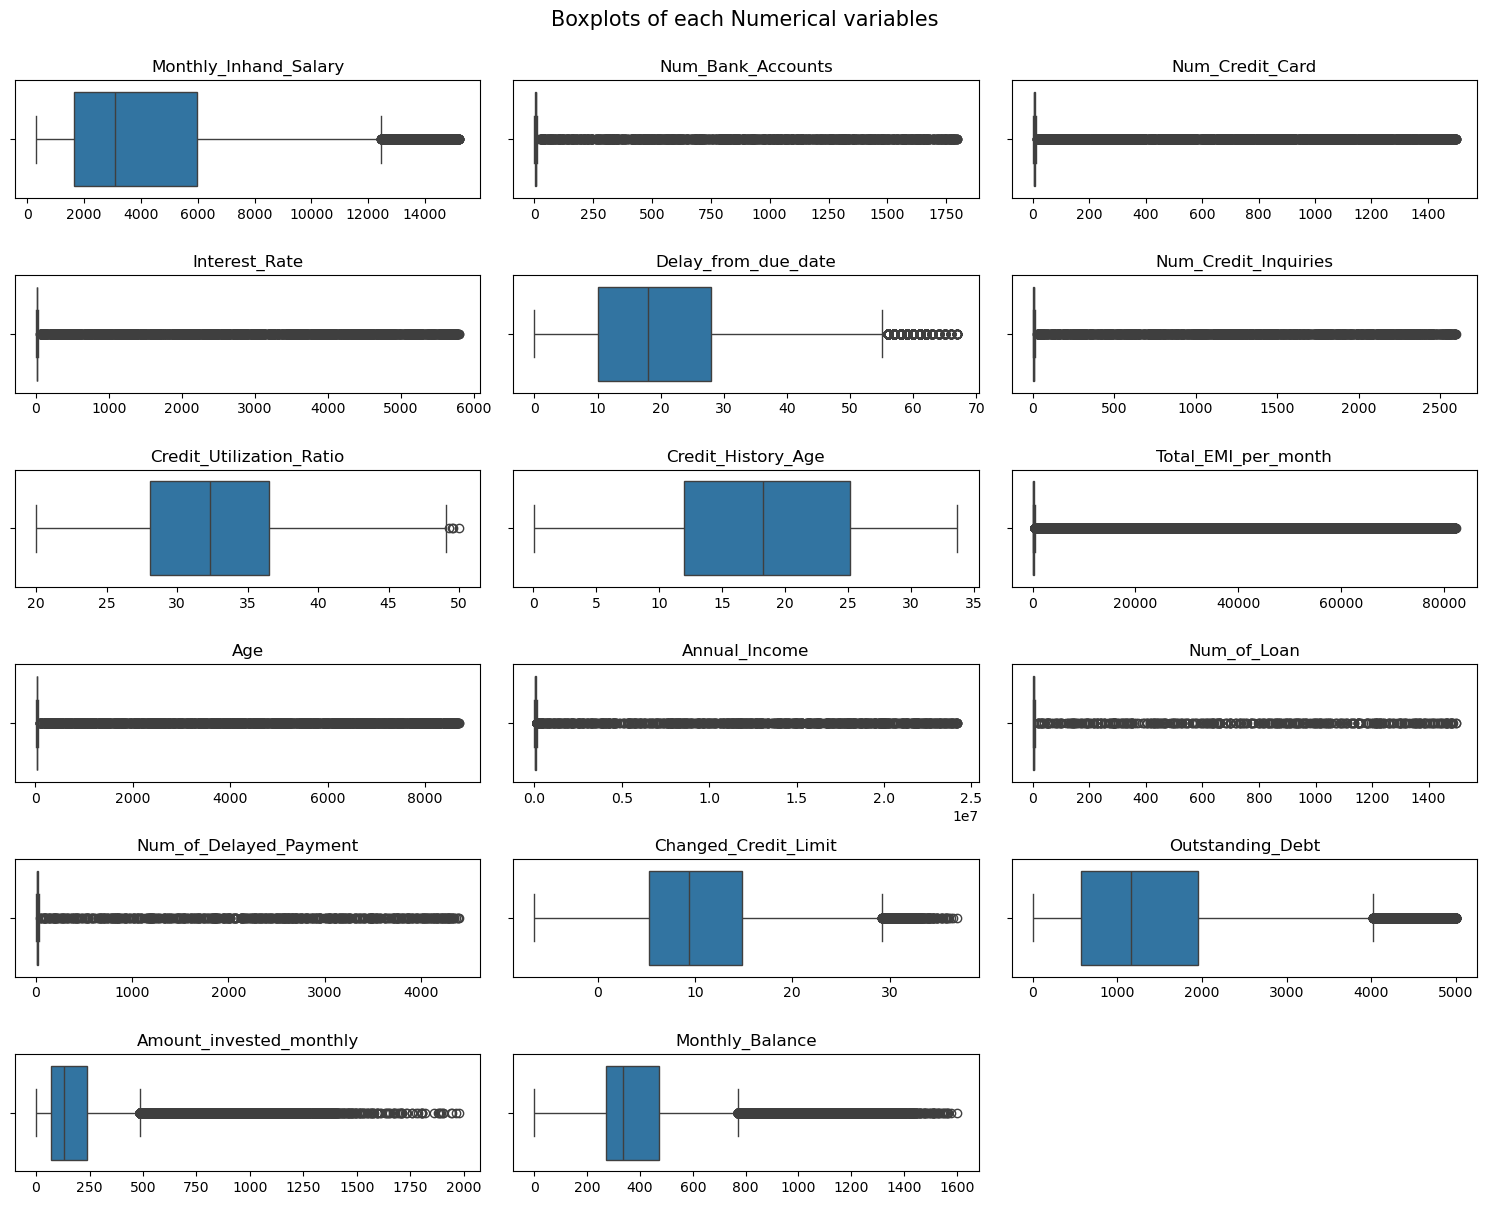

In [24]:
# Plotting BoxPLots for checking outliers
plt.figure(figsize=(15,2*6))
for i,feature in enumerate(updated_num_cols):
    plt.subplot(6,3,i+1)
    sb.boxplot(df[feature],orient='h')
    plt.xlabel('')
    plt.title(feature)
plt.suptitle('Boxplots of each Numerical variables',y=1,size=15)
plt.tight_layout();

- As seen from above, the dataset contains a very large number of outliers which has to be removed before training
- Instead of removing these and lose data, we will update the outliers as NaN values, and then use predictive imputation for them

- But before we carry one with the imputations, we will split the dataset into train and test so as to avaiod **data leakage** from the testing set to the training set during the impuations and also during the outlier removal

- By making sure that none of the data from the testing set has bled into the training set, our validation scores on the test set can be better trusted and will be an accurate representation of the model's generalization performance to unseen data.

In [69]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['Credit_Score']
y.to_csv('target.csv',index=True)

# Stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.30,random_state=300)

# Shapes of Train and Test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70000, 22), (30000, 22), (70000,), (30000,))

In [26]:
# Function to remove outliers
def remove_outliers(data, col, iqr_data=X_train):
    Q1, Q3 = iqr_data[col].quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    data[col].loc[(data[col] > upper) | (data[col] < lower)] = np.nan
    return data[col]

In [27]:
# Updating the outliers with np.nan
for col in updated_num_cols:
    X_train[col] = remove_outliers(X_train,col)
    X_test[col] = remove_outliers(X_test,col)

- We are removing the outliers of X_test based on IQR calculation of X_train to prevent data leakage

In [29]:
X_set = pd.concat([X_train,X_test],axis=0)
X_set[X_set.columns[X_set.isna().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 20097 to 70599
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       92365 non-null  float64
 1   Occupation                92938 non-null  object 
 2   Annual_Income             90327 non-null  float64
 3   Monthly_Inhand_Salary     83201 non-null  float64
 4   Num_Bank_Accounts         98685 non-null  float64
 5   Num_Credit_Card           97729 non-null  float64
 6   Interest_Rate             97966 non-null  float64
 7   Num_of_Loan               94768 non-null  float64
 8   Delay_from_due_date       95466 non-null  float64
 9   Num_of_Delayed_Payment    89537 non-null  float64
 10  Changed_Credit_Limit      97174 non-null  float64
 11  Num_Credit_Inquiries      96175 non-null  float64
 12  Credit_Mix                79805 non-null  object 
 13  Outstanding_Debt          92863 non-null  float64
 14  Credit

- Shown above are the all features that contain null values
- Most of the null values are present in numerical columns and three of the object type columns also contain null values

- We will use ItertativeImputer to impute all the NaN values in our dataset (Numerical columns) by predicting these values
- IterativeImputer will initially impute all the missing values in the entire dataset using the initial strategy mentioned
- Then these initially imputations are refined continuosly for each iteration
- For each iteration the missing values in a particular feature are imputed as a function of other functions in a round robin fashion

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import joblib

imputer = IterativeImputer(max_iter=10,
                           initial_strategy='median',
                           estimator=RandomForestRegressor(n_estimators=10,
                                                           max_depth=15,
                                                           max_samples=0.7,
                                                           n_jobs=-1)
)
imputed = imputer.fit_transform(X_train[updated_num_cols])

# Saving the imputer model
# joblib.dump(imputed,'IterativeImputer.joblib')

# Getting the imputed dataframe
X_train_temp = pd.DataFrame(imputed,columns=X_train[updated_num_cols].columns,index=X_train.index)
X_train.update(X_train_temp)

In [32]:
X_test[updated_num_cols].isnull().sum().sum()

39072

- Above all NaN values in X_train was imputed using IterativeImputer
- Using the imputer model learnt from X_train we will impute the NaN values in X_test using the transform method of the imputer model

In [33]:
# Transforming the NaN values in X_test using the trained IterativeImputer model
X_test_temp = pd.DataFrame(imputer.transform(X_test[updated_num_cols]),
                           columns=X_test[updated_num_cols].columns,
                           index=X_test.index)
X_test.update(X_test_temp)

- Plotting the boxplots (for X_train) after the outliers and the NaN values were imputed using IterativeImputer

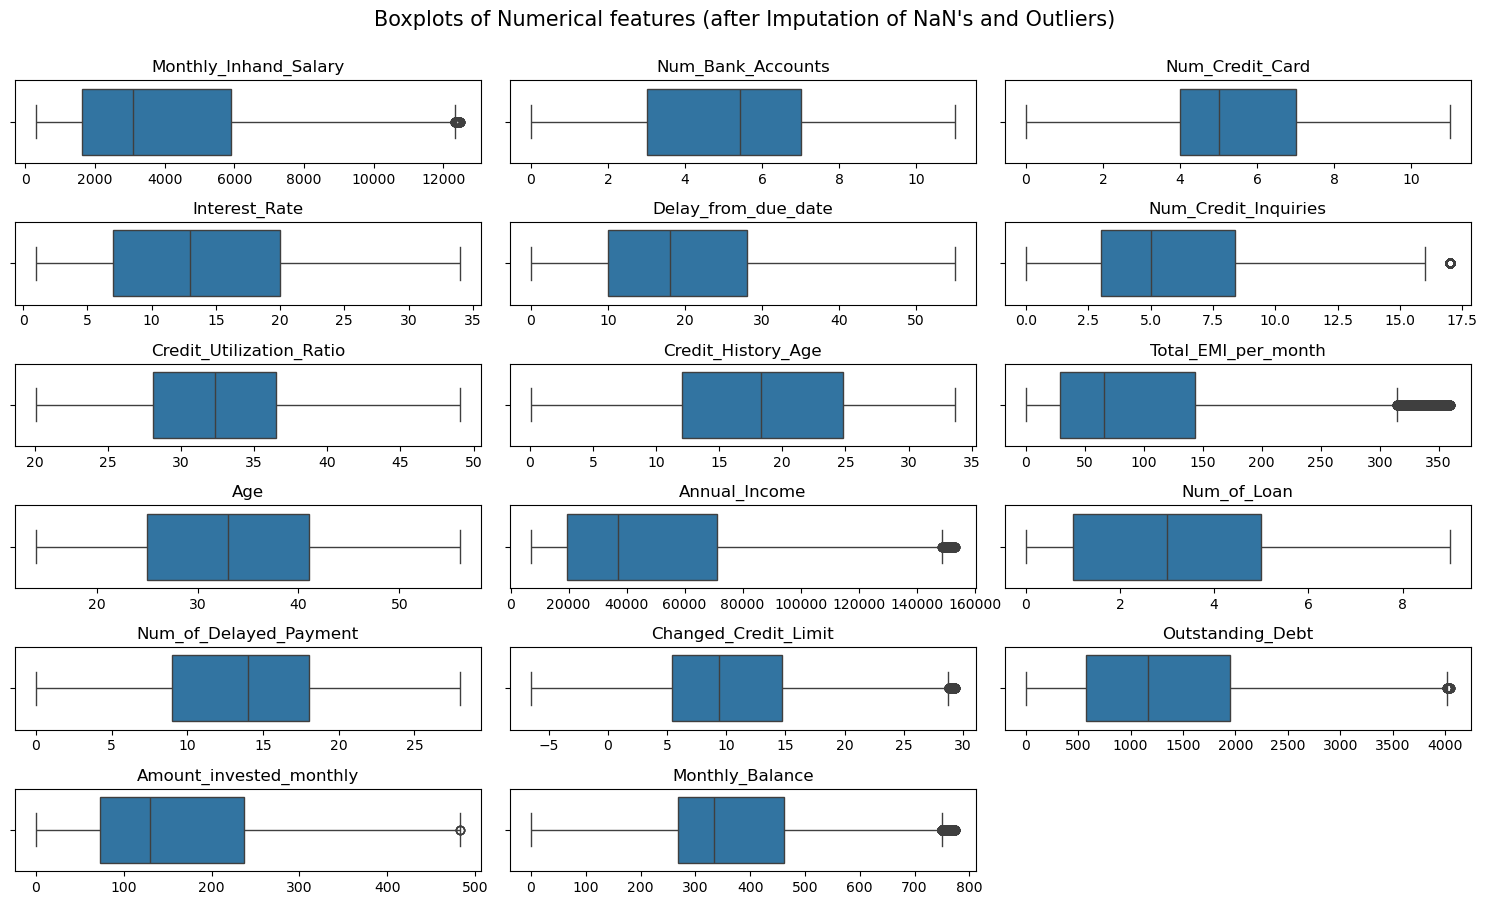

In [34]:
plt.figure(figsize=(15,1.5*6))
for i,feature in enumerate(X_train[updated_num_cols].columns):
    plt.subplot(6,3,i+1)
    sb.boxplot(X_train[feature],orient='h')
    plt.xlabel('')
    plt.title(feature)
plt.suptitle("Boxplots of Numerical features (after Imputation of NaN\'s and Outliers)",y=1,size=15)
plt.tight_layout();

- The presence of small amount of these outliers can be ignored, as the values for each features are well within the Non Outlier range, according to our initail IQR calculation

- To impute the null values in Occupation, Credit_Mix and Payment_Behaviour columns we will use RandomForestClassifier as a predictive imputer

In [65]:
# Function to impute the 3 remaining object columns containing null values
from sklearn.ensemble import RandomForestClassifier

def RFImputer(xtrain, xtest, train_target, test_target, col):
    '''
    Imputes NaN values in target columns using RandomForestClassifier

    xtrain = X_train with columns to impute removed |
    xtest = X_test with columns to impute removed |
    train_target =  Target columns to impute from X_train |
    test_target = Target columns to impute from X_test |
    col = Target column to impute |

    returns imputed X_train values, X_test values and train accuracy
    '''
    # Splitting the train data based on presence of null values
    # All non null values will be used for training
    xtrain_x_train = xtrain.loc[train_target[col].notna()]
    xtrain_y_train = train_target[col].loc[train_target[col].notna()]

    # xtrain data that correponds to null values in train_target is x_test for train data
    xtrain_x_test = xtrain.loc[train_target[col].isna()]

    # xtest data that correponds to null values in test_target is x_test for test data
    xtest_x_test = xtest.loc[test_target[col].isna()]

    # Fitting the model
    # The model trained on the x and y from xtrain is used for predicting null values in both test data and train data
    rf = RandomForestClassifier().fit(xtrain_x_train,xtrain_y_train)
    train_accuracy = rf.score(xtrain_x_train,xtrain_y_train)

    # Predicting the null values in col
    xtrain_y_test = rf.predict(xtrain_x_test)
    xtest_y_test = rf.predict(xtest_x_test)

    return xtrain_y_test, xtest_y_test, train_accuracy

In [38]:
# Preparing the data for the above function
rf_data_train = X_train.drop(['Credit_Mix', 'Payment_Behaviour', 'Occupation'],axis=1)
rf_data_train_encoded = pd.get_dummies(data=rf_data_train,columns=['Month', 'Payment_of_Min_Amount'],drop_first=True)
rf_train_targets = X_train[['Credit_Mix', 'Payment_Behaviour', 'Occupation']]

rf_data_test = X_test.drop(['Credit_Mix', 'Payment_Behaviour', 'Occupation'],axis=1)
rf_data_test_encoded = pd.get_dummies(data=rf_data_test,columns=['Month', 'Payment_of_Min_Amount'],drop_first=True)
rf_test_targets = X_test[['Credit_Mix', 'Payment_Behaviour', 'Occupation']]

In [39]:
# Features that has to be imputed
impute_cols = ['Credit_Mix','Payment_Behaviour', 'Occupation']

# NaN values in 'Credit_Mix','Payment_Behaviour' and 'Occupation' will be imputed Using RandomForestClassifier
# This imputer is trained on X_train alone
for col in impute_cols:
    X_train_imputed, X_test_imputed, train_accuracy = RFImputer(rf_data_train_encoded,rf_data_test_encoded,
                                                                rf_train_targets,rf_test_targets,col)
    X_train.loc[X_train[col].isnull(),col] = X_train_imputed
    X_test.loc[X_test[col].isnull(),col] = X_test_imputed
    print(f"Train accuracy for {col}: {train_accuracy}")

Train accuracy for Credit_Mix: 0.9999820836692646
Train accuracy for Payment_Behaviour: 1.0
Train accuracy for Occupation: 1.0


In [40]:
# Saving the cleaned dataset
X_train.to_csv('X_train_cleaned.csv',index=True)
X_test.to_csv('X_test_cleaned.csv',index=True)

- Now that data is cleaned, we will apply the necessary preprocessing steps 

**Preprocessing Steps For the Data**

- Ordinal Encoding followed by MinMaxScaler for 'Payment_Behaviour' and 'Credit_Mix' columns
- One-Hot Encoding 'Month', 'Occupation' and 'Payment_of_Min_Amount' columns
- Standardization for the rest of columns (17 numerical columns)

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,MinMaxScaler

In [6]:
# Specifying the order for OrdinalEncoder
payment_behaviour_order = ['Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 
                           'Low_spent_Large_value_payments', 'High_spent_Small_value_payments', 
                           'High_spent_Medium_value_payments', 'High_spent_Large_value_payments']
credit_mix_order = ['Bad', 'Standard', 'Good']

# All the features in the dataset each with different preprocessing steps for ColumnTranfomer
ord_cols = ['Payment_Behaviour', 'Credit_Mix']
oh_cols = ['Month', 'Occupation', 'Payment_of_Min_Amount']
stdzn_cols = X_train.select_dtypes(exclude='O').columns.to_list()

# Each ColumnTranfomer steps mach in separate pipelines
ord_pipe = make_pipeline(OrdinalEncoder(categories=[payment_behaviour_order, credit_mix_order]),
                         MinMaxScaler())
oh_pipe = make_pipeline(OneHotEncoder(drop='first'))
stdzn_pipe = make_pipeline(StandardScaler())

# Final preprocessor object for this dataset which can be used on new data
preprocessor = make_column_transformer(
    (ord_pipe,ord_cols),
    (oh_pipe,oh_cols),
    (stdzn_pipe,stdzn_cols),
    remainder='passthrough',
    sparse_threshold=0
)
joblib.dump(preprocessor,'preprocessor.joblib')

preprocessor

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low_spent_Small_value_payments',
                                                                              'Low_spent_Medium_value_payments',
                                                                              'Low_spent_Large_value_payments',
                                                                              'High_spent_Small_value_payments',
                                                                              'High_spent_Medium_value_payments',
                                                                              'High_spent_Large_value_paymen...
                                                  StandardScaler())]),
                                 ['Age', 'Annual_Income',
                                  'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                                  'Num_Credit_Card', 'Interest_Rate',
                                  'Num_of_Loan', 'Delay_from_due_date',
                                  'Num_of_Delayed_Payment',
                                  'Changed_Credit_Limit',
                                  'Num_Credit_Inquiries', 'Outstanding_Debt',
                                  'Credit_Utilization_Ratio',
                                  'Credit_History_Age', 'Total_EMI_per_month',
                                  'Amount_invested_monthly',
                                  'Monthly_Balance'])])

In [7]:
# Applying the preprocessor on X_train
X_train_preprocessed = preprocessor.fit_transform(X_train)
# Transforming X_test
X_test_preprocessed = preprocessor.transform(X_test)

# Saving the output matrix into a dataframe
X_train_preprocessed = pd.DataFrame(X_train_preprocessed,
                                    columns=[names.split('__')[1] for names in preprocessor.get_feature_names_out()],
                                    index=X_train.index)

X_test_preprocessed = pd.DataFrame(X_test_preprocessed,
                                   columns=[names.split('__')[1] for names in preprocessor.get_feature_names_out()],
                                   index=X_test.index)

# Saving the dataframe to a csv file
X_train_preprocessed.to_csv('X_train_preprocessed.csv',index=True)
X_test_preprocessed.to_csv('X_test_preprocessed.csv',index=True)
X_train_preprocessed.sample(5)

,Payment_Behaviour,Credit_Mix,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Architect,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
51586,0.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.472906,-1.349239,-1.041915,0.317464,-0.284976,0.964212,0.592027,-0.394078,1.786129,0.269624
10660,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.686043,0.755856,-1.120573,-0.464108,-0.254008,0.341640,-0.203334,-0.023427,0.270789,-0.759362
80404,0.4,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.223411,0.431995,0.529720,2.662178,0.368345,-0.196182,-1.202633,-0.165098,0.917032,-0.136406
15122,0.2,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.393431,0.402555,1.098473,1.099035,0.866331,-1.395508,-0.706205,0.869235,1.050555,-1.542498
60926,1.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.146306,-0.863447,0.765692,0.056940,-1.352332,-0.439328,0.173953,-0.726070,-1.211581,0.007878


- This Cleaned/Preprocessed data will now be used to train the models